In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
%matplotlib inline

###### NB! In order to get around the missing value problem we did following measures outside of Python:
1. Loaded the original test and train data sets in Notepad++ and removed the first row containing the label data
2. Replaced all 'unknown' values with 'gg'
3. Replaced all 'n' with 0
4. Replaced all 'y' with 1
5. Corrected back the changes to the label 'republican' from 'republica0' back to 'republican'
6. Replaced 'gg' with NaN
6. Put back in the first row label data for all columns: 
   ID,"handicapped-infants","water-project-cost-sharing","adoption-of-the-budget-resolution","physician-fee-freeze","el-salvador-aid","religious-groups-in-schools","anti-satellite-test-ban","aid-to-nicaraguan-contras","mx-missile","immigration","synfuels-crporation-cutback","education-spending","superfund-right-to-sue","crime","duty-free-exports","export-administration-act-south-africa"
7. Loaded the newly created Train and Test data sets into the Jupyter notebook.

###### Preprocessing

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4241-80C5

 Directory of C:\Users\Radi Radev\Documents\TU Wien Master\Data Science\ML\Congressional_Voting

16.12.2019 ?.  23:00    <DIR>          .
16.12.2019 ?.  23:00    <DIR>          ..
13.12.2019 ?.  16:17    <DIR>          .ipynb_checkpoints
16.12.2019 ?.  23:00         2 567 937 Congressional_Voting.ipynb
19.12.2016 ?.  15:20             2 783 CongressionalVotingID.shuf.sampleSubmission.csv
19.12.2016 ?.  15:20             9 236 CongressionalVotingID.shuf.test.csv
19.12.2016 ?.  15:20            11 574 CongressionalVotingID.shuf.train.csv
16.12.2019 ?.  23:02             3 617 results_lr.csv
15.12.2019 ?.  13:05             8 730 Test.csv
15.12.2019 ?.  13:03            10 947 Train.csv
               7 File(s)      2 614 824 bytes
               3 Dir(s)  215 470 100 480 bytes free


In [3]:
train = pd.read_csv('Train.csv',na_values="NaN")
test = pd.read_csv('Test.csv',na_values="NaN")

In [4]:
train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,134,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,224,republican,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,32,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,171,democrat,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN
4,333,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


In [5]:
train.tail(20)

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
198,340,republican,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
199,345,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
200,128,democrat,0.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
201,33,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
202,422,democrat,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
203,11,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
204,279,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
205,70,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
206,161,democrat,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
207,149,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [6]:
test

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,368,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
1,15,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN
2,94,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,107,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,285,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,408,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
213,187,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
214,377,1.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
215,54,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


###### Specific Outliers with many NaN values

In [7]:
train.iloc[63:64,:]


,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
63,184,democrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train.iloc[67:68,:]

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
67,108,republican,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


###### Null values information

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 18 columns):
ID                                        218 non-null int64
class                                     218 non-null object
handicapped-infants                       213 non-null float64
water-project-cost-sharing                188 non-null float64
adoption-of-the-budget-resolution         212 non-null float64
physician-fee-freeze                      213 non-null float64
el-salvador-aid                           208 non-null float64
religious-groups-in-schools               210 non-null float64
anti-satellite-test-ban                   207 non-null float64
aid-to-nicaraguan-contras                 211 non-null float64
mx-missile                                206 non-null float64
immigration                               214 non-null float64
synfuels-crporation-cutback               208 non-null float64
education-spending                        198 non-null float64
superfund-right-

In [10]:
train.isnull().sum()

ID                                         0
class                                      0
handicapped-infants                        5
water-project-cost-sharing                30
adoption-of-the-budget-resolution          6
physician-fee-freeze                       5
el-salvador-aid                           10
religious-groups-in-schools                8
anti-satellite-test-ban                   11
aid-to-nicaraguan-contras                  7
mx-missile                                12
immigration                                4
synfuels-crporation-cutback               10
education-spending                        20
superfund-right-to-sue                    10
crime                                      8
duty-free-exports                         14
export-administration-act-south-africa    51
dtype: int64

In [11]:
train.describe()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,218.000000,213.000000,188.000000,212.000000,213.000000,208.000000,210.000000,207.000000,211.000000,206.000000,214.000000,208.000000,198.000000,208.000000,210.000000,204.000000,167.000000
mean,206.811927,0.469484,0.542553,0.622642,0.399061,0.514423,0.623810,0.560386,0.568720,0.495146,0.518692,0.379808,0.429293,0.528846,0.585714,0.421569,0.814371
std,124.240685,0.500244,0.499516,0.485873,0.490859,0.500998,0.485586,0.497543,0.496433,0.501194,0.500822,0.486510,0.496230,0.500371,0.493775,0.495025,0.389976
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,205.500000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,307.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,435.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


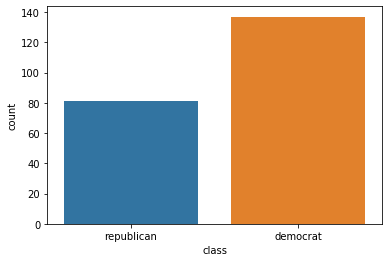

In [12]:
sns.countplot(train['class'])

###### Sorting the data set based on class in order to help with the handling of the missing values.
One hot encoding the class variables.

In [13]:
train_sorted=train.sort_values(by=['class'])

OHE = OneHotEncoder(sparse=False)
le = LabelEncoder()
train_sorted['class'] = OHE.fit_transform(train_sorted[['class']])

train_sorted

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
108,289,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
97,313,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
98,290,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN
183,355,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,1.0
100,104,1.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,147,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
92,118,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
90,57,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
87,135,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


###### Spliting the test set X in two based on class for democrats and republicans.
democrat = 1
republican = 0

In [14]:
#split X to get the unknown values properly reflected based on the two classes
democrat = train_sorted[train_sorted['class'] == 1]
republican = train_sorted[train_sorted['class'] == 0]

In [15]:
democrat

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
108,289,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
97,313,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
98,290,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN
183,355,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,1.0
100,104,1.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,152,1.0,1.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0,1.0,0.0,0.0
55,163,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
56,351,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
51,180,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [16]:
republican

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
162,379,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
215,120,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
214,421,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
194,68,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
207,149,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,147,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
92,118,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
90,57,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
87,135,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


###### Label encoding was done as a preprocessing step in Notepad++ as it was much easier to do.

###### Impute with mean value for the democrat set

In [17]:
dem_impute= democrat
dem_impute.to_numpy()

array([[289.,   1.,   1., ...,   1.,   1.,   1.],
       [313.,   1.,   1., ...,   0.,   1.,   1.],
       [290.,   1.,   1., ...,   1.,   0.,  nan],
       ...,
       [351.,   1.,   0., ...,   0.,   1.,   1.],
       [180.,   1.,   1., ...,   0.,   1.,   1.],
       [158.,   1.,   0., ...,  nan,  nan,  nan]])

In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dem_impute)
arr_dem=imp.transform(dem_impute)
arr_dem

array([[2.89000000e+02, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.13000000e+02, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.90000000e+02, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 9.27835052e-01],
       ...,
       [3.51000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.80000000e+02, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.58000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        3.43511450e-01, 6.06060606e-01, 9.27835052e-01]])

###### Impute with mean value the republican set

In [19]:
rep_impute=republican
rep_impute.to_numpy()

array([[379.,   0.,   0., ...,   1.,   0.,   1.],
       [120.,   0.,   0., ...,   1.,   0.,   0.],
       [421.,   0.,   1., ...,   1.,   0.,   1.],
       ...,
       [ 57.,   0.,   0., ...,   1.,   0.,   1.],
       [135.,   0.,   0., ...,   1.,   0.,  nan],
       [230.,   0.,   0., ...,   1.,   0.,   1.]])

In [20]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(rep_impute)
arr_rep=imp.transform(rep_impute)
arr_rep

array([[379.        ,   0.        ,   0.        , ...,   1.        ,
          0.        ,   1.        ],
       [120.        ,   0.        ,   0.        , ...,   1.        ,
          0.        ,   0.        ],
       [421.        ,   0.        ,   1.        , ...,   1.        ,
          0.        ,   1.        ],
       ...,
       [ 57.        ,   0.        ,   0.        , ...,   1.        ,
          0.        ,   1.        ],
       [135.        ,   0.        ,   0.        , ...,   1.        ,
          0.        ,   0.65714286],
       [230.        ,   0.        ,   0.        , ...,   1.        ,
          0.        ,   1.        ]])

###### Put back the democrat set in a data frame and correct the column label after imputing the missing values with their mean

In [21]:
imputed_dem=pd.DataFrame(arr_dem, columns=['ID','class','handicapped-infants',
          'water-project-cost-sharing',
          'adoption-of-the-budget-resolution',
          'physician-fee-freeze',
          'el-salvador-aid',
          'religious-groups-in-schools',
          'anti-satellite-test-ban',
          'aid-to-nicaraguan-contras',
          'mx-missile',
          'immigration',
          'synfuels-crporation-cutback',
          'education-spending',
          'superfund-right-to-sue',
          'crime',
          'duty-free-exports',
          'export-administration-act-south-africa'])
imputed_dem

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,289.0,1.0,1.0,1.0,1.000000,0.0,1.0,1.0,0.000000,1.0,0.000000,1.0,1.0,0.000,1.000000,1.000000,1.000000,1.000000
1,313.0,1.0,1.0,1.0,1.000000,0.0,0.0,0.0,1.000000,1.0,1.000000,1.0,0.0,0.000,0.000000,0.000000,1.000000,1.000000
2,290.0,1.0,1.0,1.0,1.000000,0.0,1.0,1.0,0.000000,1.0,0.000000,1.0,1.0,0.000,1.000000,1.000000,0.000000,0.927835
3,355.0,1.0,0.0,1.0,1.000000,0.0,0.0,1.0,1.000000,1.0,1.000000,1.0,0.0,0.152,0.000000,0.000000,1.000000,1.000000
4,104.0,1.0,1.0,0.0,0.000000,0.0,1.0,1.0,0.744186,0.0,0.740157,0.0,0.0,0.000,0.000000,1.000000,0.606061,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,152.0,1.0,1.0,1.0,0.902985,1.0,1.0,1.0,0.000000,0.0,1.000000,0.0,1.0,0.152,1.000000,1.000000,0.000000,0.000000
133,163.0,1.0,0.0,1.0,1.000000,0.0,1.0,1.0,1.000000,0.0,0.000000,0.0,1.0,1.000,1.000000,1.000000,0.000000,1.000000
134,351.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.000000,0.0,1.000000,0.0,1.0,0.000,0.000000,0.000000,1.000000,1.000000
135,180.0,1.0,1.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.0,1.000000,1.0,0.0,0.000,0.000000,0.000000,1.000000,1.000000


###### Put back the republican set in a data frame and correct the column label after imputing the missing values with their mean

In [22]:
imputed_rep=pd.DataFrame(arr_rep, columns=['ID','class','handicapped-infants',
          'water-project-cost-sharing',
          'adoption-of-the-budget-resolution',
          'physician-fee-freeze',
          'el-salvador-aid',
          'religious-groups-in-schools',
          'anti-satellite-test-ban',
          'aid-to-nicaraguan-contras',
          'mx-missile',
          'immigration',
          'synfuels-crporation-cutback',
          'education-spending',
          'superfund-right-to-sue',
          'crime',
          'duty-free-exports',
          'export-administration-act-south-africa'])
imputed_rep

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,379.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000
1,120.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000
2,421.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.000000
3,68.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.000000
4,149.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,147.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000
77,118.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000
78,57.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.000000
79,135.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.657143


###### Merge both the republican and democrat sets back after imputing the missing values.
We do this in order to no lose information as the data set is too small and every missing value can throw us off.

In [23]:
train_merged = imputed_dem.append(imputed_rep)
train_merged

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,289.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000000,1.0,0.000000,1.0,1.0,0.000,1.0,1.0,1.000000,1.000000
1,313.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.000000,1.0,1.000000,1.0,0.0,0.000,0.0,0.0,1.000000,1.000000
2,290.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000000,1.0,0.000000,1.0,1.0,0.000,1.0,1.0,0.000000,0.927835
3,355.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,1.0,1.000000,1.0,0.0,0.152,0.0,0.0,1.000000,1.000000
4,104.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.744186,0.0,0.740157,0.0,0.0,0.000,0.0,1.0,0.606061,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,147.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.000000,0.0,0.0,1.000,1.0,1.0,0.000000,1.000000
77,118.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.000,1.0,1.0,0.000000,1.000000
78,57.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.000000,1.0,1.0,1.000,1.0,1.0,0.000000,1.000000
79,135.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.000000,0.0,0.0,1.000,1.0,1.0,0.000000,0.657143


###### Preprocessing the test set by imputing the missing values in the same way as in the train set, however without the split in two categories, as this is not possible(class label is omited form the data set)

In [24]:
#Imputing the test set, convert to array
test_impute=test
test_impute.to_numpy()

array([[368.,   1.,   1., ...,   0.,   1.,  nan],
       [ 15.,   0.,   1., ...,  nan,   0.,  nan],
       [ 94.,   1.,   0., ...,   0.,   1.,   1.],
       ...,
       [377.,   1.,  nan, ...,   0.,   1.,   1.],
       [ 54.,   1.,   1., ...,   1.,   0.,   0.],
       [103.,   1.,   0., ...,   1.,   1.,  nan]])

In [25]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(test_impute)
arr_test=imp.transform(test_impute)
arr_test

array([[368.        ,   1.        ,   1.        , ...,   0.        ,
          1.        ,   0.81097561],
       [ 15.        ,   0.        ,   1.        , ...,   0.60096154,
          0.        ,   0.81097561],
       [ 94.        ,   1.        ,   0.        , ...,   0.        ,
          1.        ,   1.        ],
       ...,
       [377.        ,   1.        ,   0.46733668, ...,   0.        ,
          1.        ,   1.        ],
       [ 54.        ,   1.        ,   1.        , ...,   1.        ,
          0.        ,   0.        ],
       [103.        ,   1.        ,   0.        , ...,   1.        ,
          1.        ,   0.81097561]])

###### Put back the test set in a data frame and correct the column label after imputing the missing values with their mean

In [26]:
imputed_test=pd.DataFrame(arr_test, columns=['ID','handicapped-infants',
          'water-project-cost-sharing',
          'adoption-of-the-budget-resolution',
          'physician-fee-freeze',
          'el-salvador-aid',
          'religious-groups-in-schools',
          'anti-satellite-test-ban',
          'aid-to-nicaraguan-contras',
          'mx-missile',
          'immigration',
          'synfuels-crporation-cutback',
          'education-spending',
          'superfund-right-to-sue',
          'crime',
          'duty-free-exports',
          'export-administration-act-south-africa'])
imputed_test

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,368.0,1.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,0.0,0.000000,0.000000,1.000000,0.810976
1,15.0,0.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.490099,0.600962,0.000000,0.810976
2,94.0,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000
3,107.0,0.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.000000,1.000000,0.000000,1.000000
4,285.0,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.000000,0.000000,0.433498,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,408.0,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,1.0,1.0,1.000000,1.000000,0.000000,0.000000
213,187.0,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000
214,377.0,1.0,0.467337,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000
215,54.0,1.0,1.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.0,1.0,1.000000,1.000000,0.000000,0.000000


###### Check for correlations between the variables on the sorted initial data set without imputation of the missing values

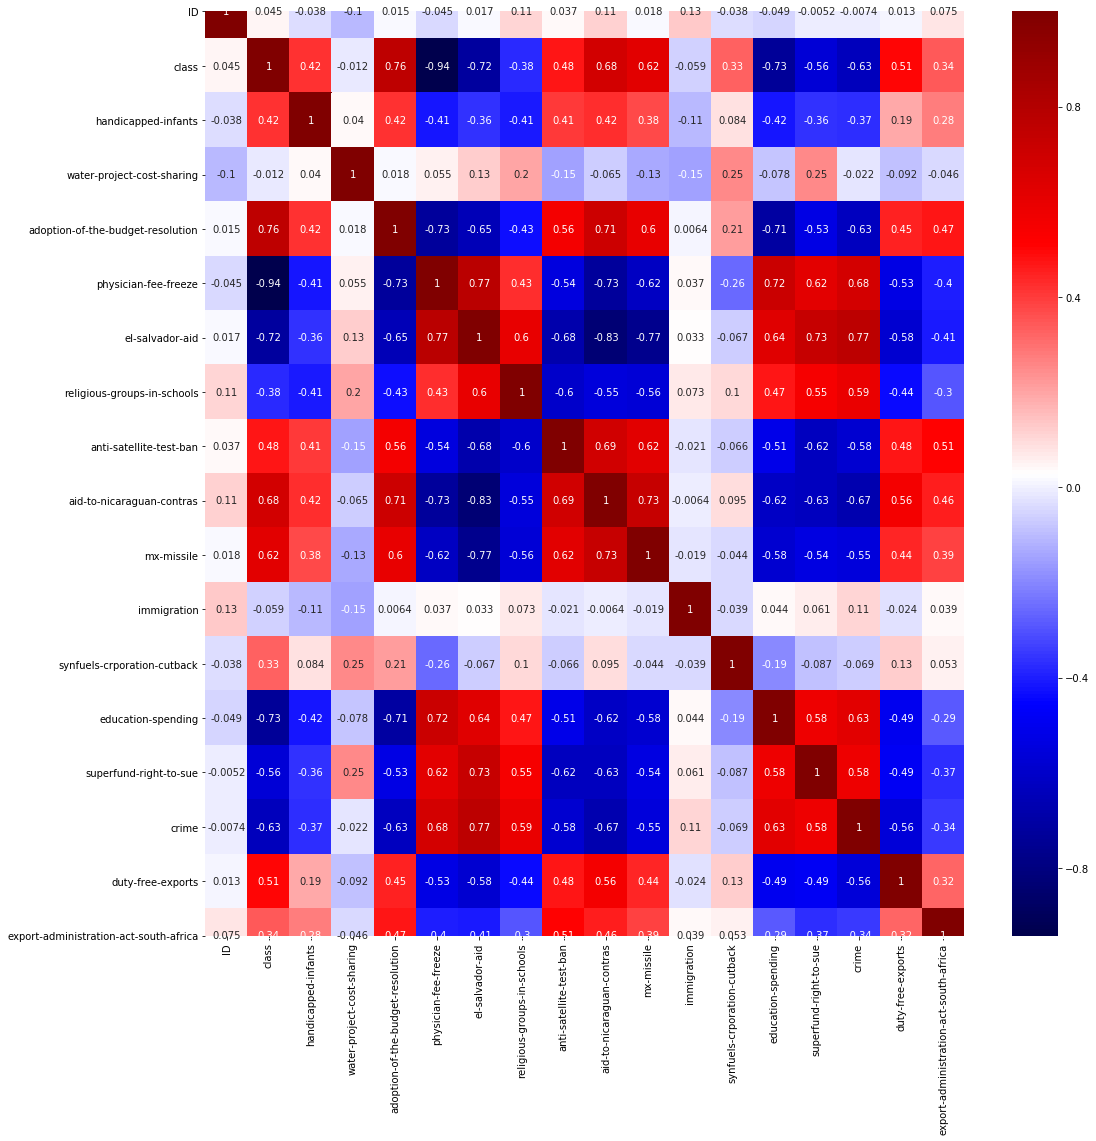

In [27]:
plt.figure(figsize=(17,17))
cor = train_sorted.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.seismic)
plt.show()

###### Correlation of merged data set after imputing

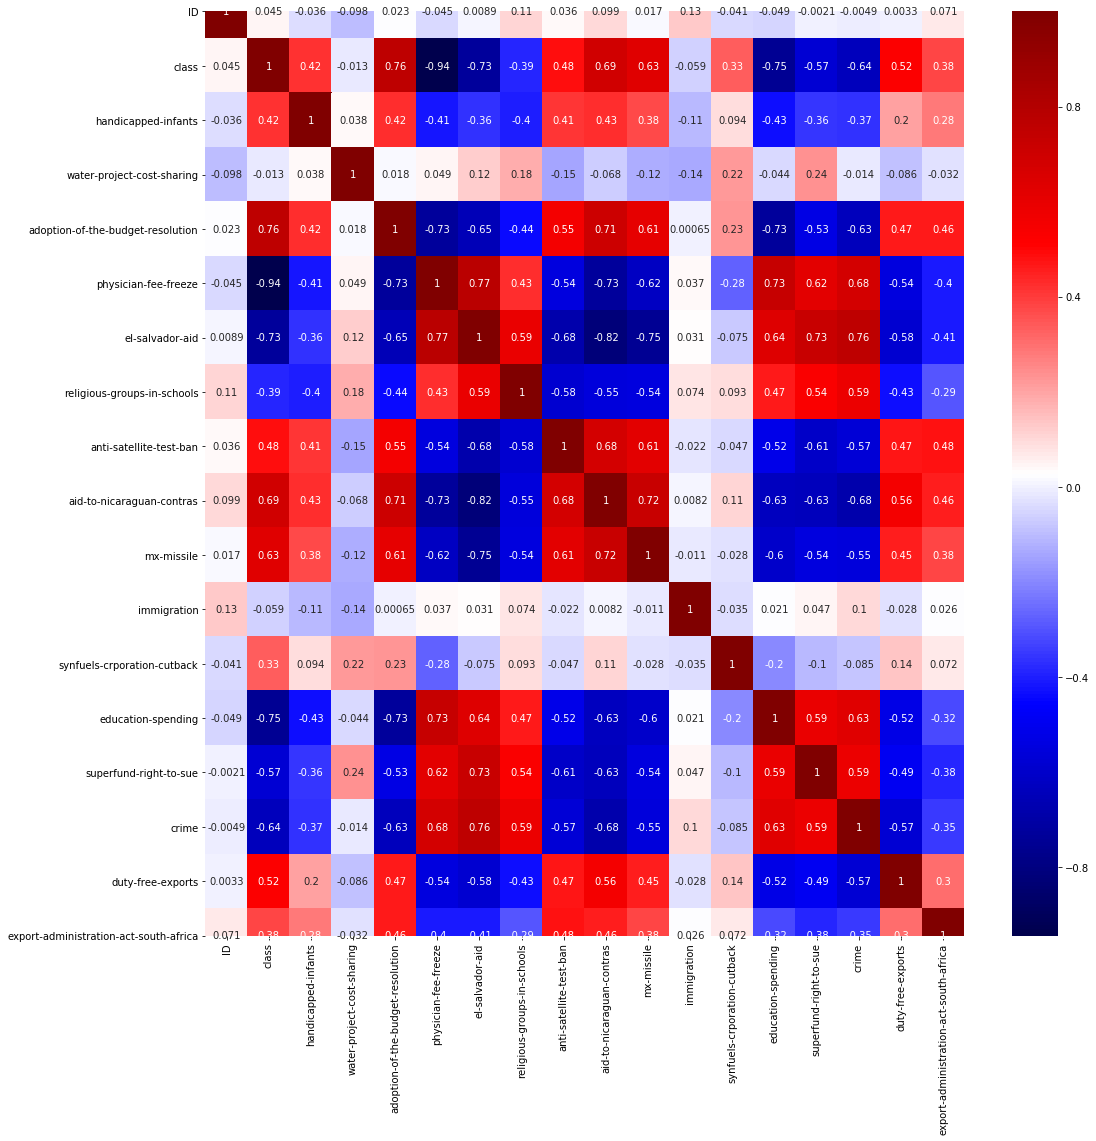

In [28]:
plt.figure(figsize=(17,17))
cor = train_merged.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.seismic)
plt.show()

Correlations for Democrats before imputing missing values

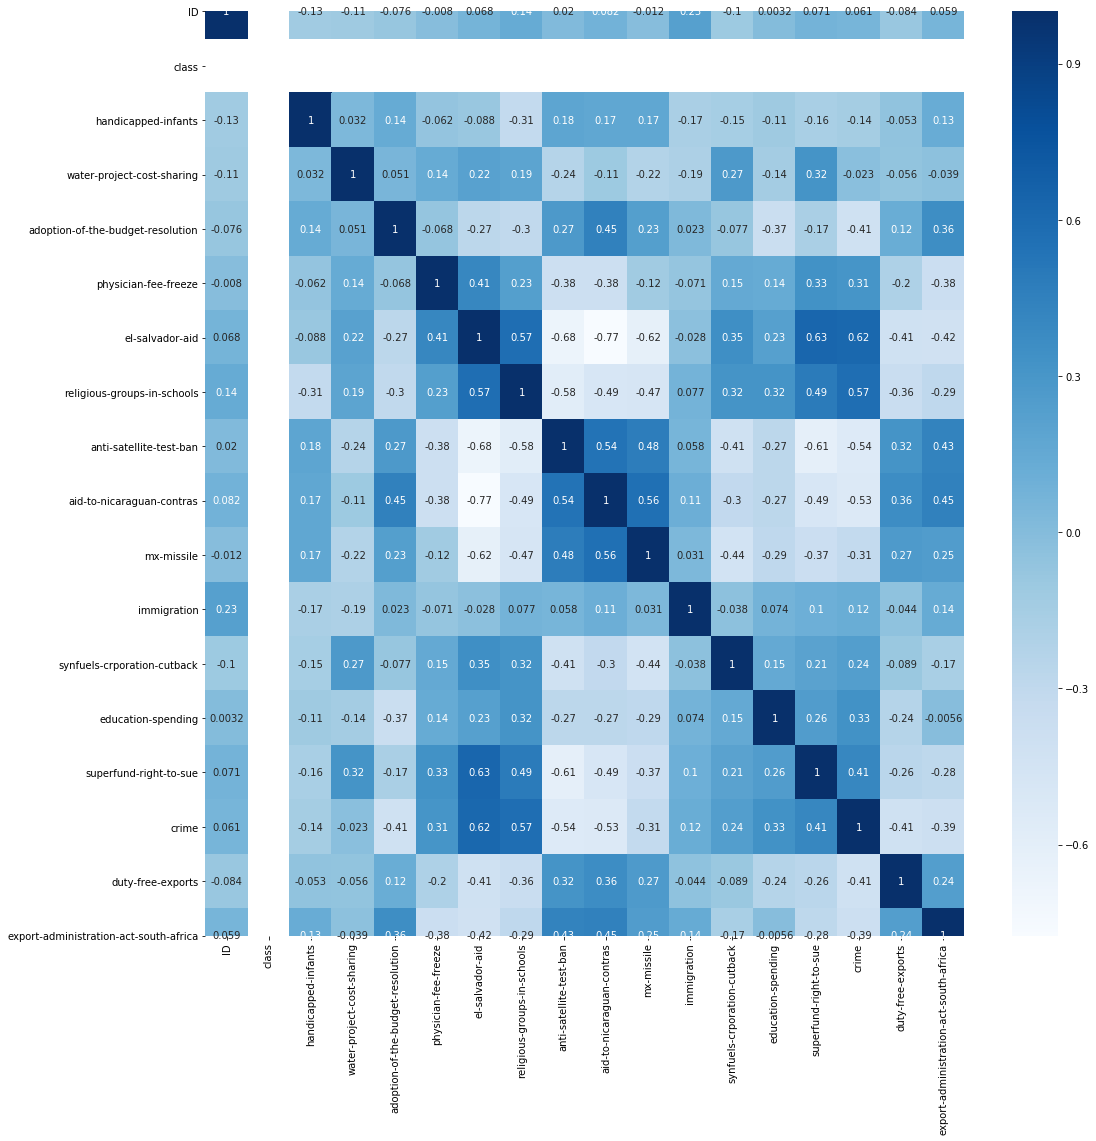

In [29]:
plt.figure(figsize=(17,17))
cor = democrat.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Correlation for the Democrats after imputing

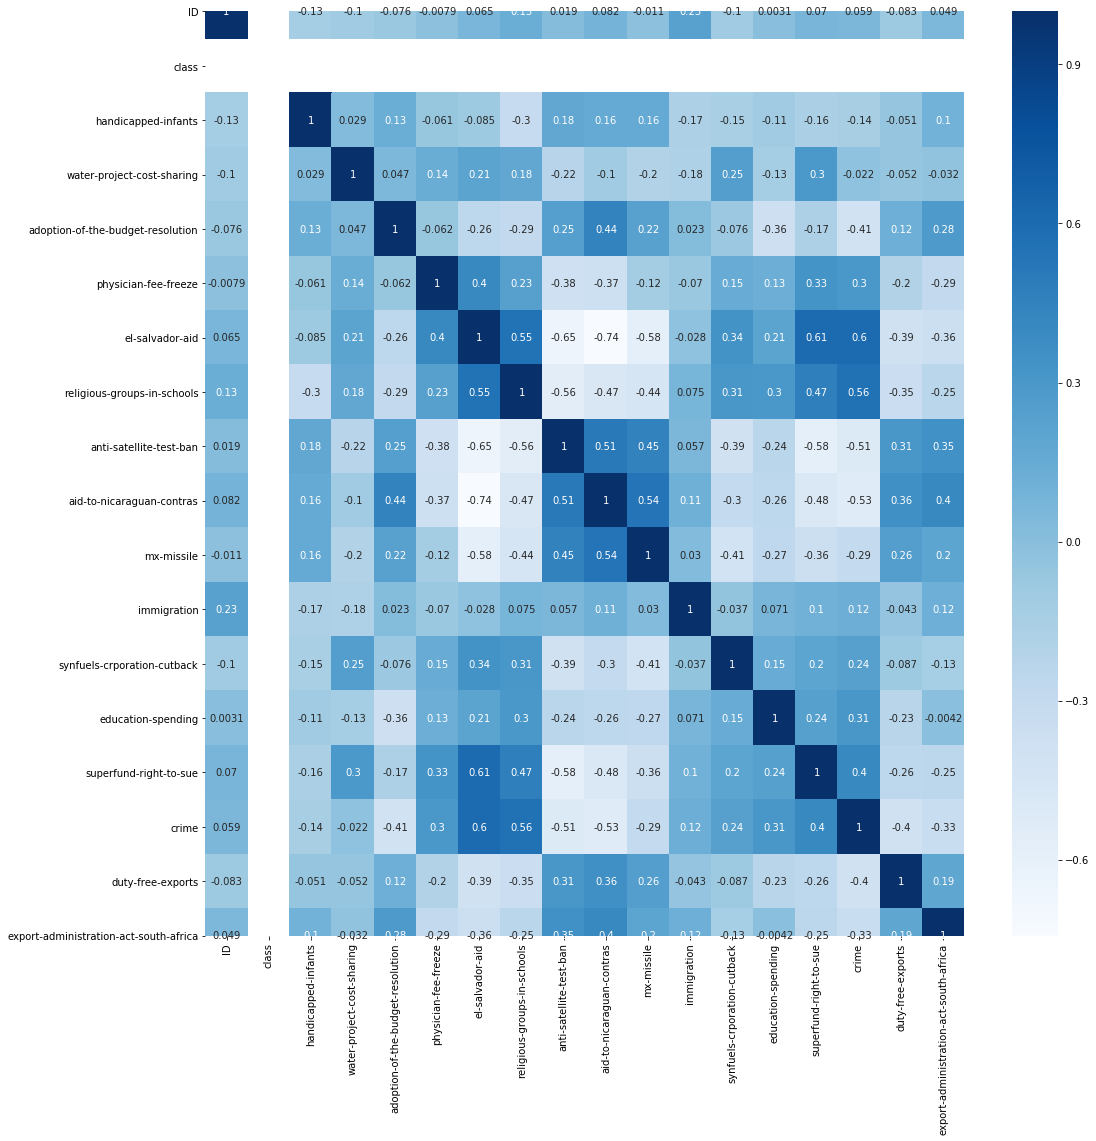

In [30]:
plt.figure(figsize=(17,17))
cor = imputed_dem.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Correlations for the Republicans before imputing

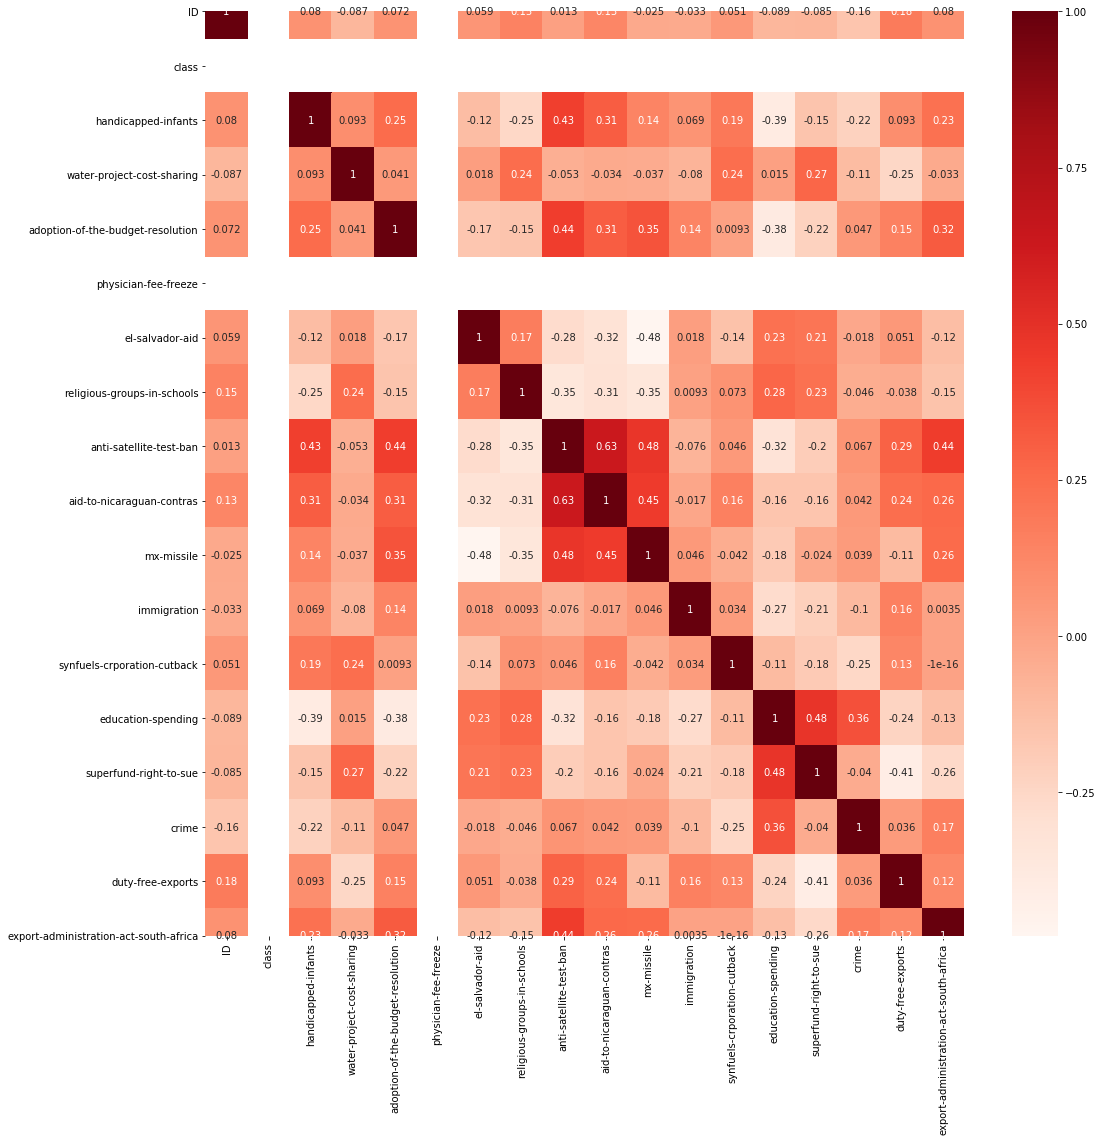

In [31]:
plt.figure(figsize=(17,17))
cor = republican.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Correlations for the Republicans after imputing

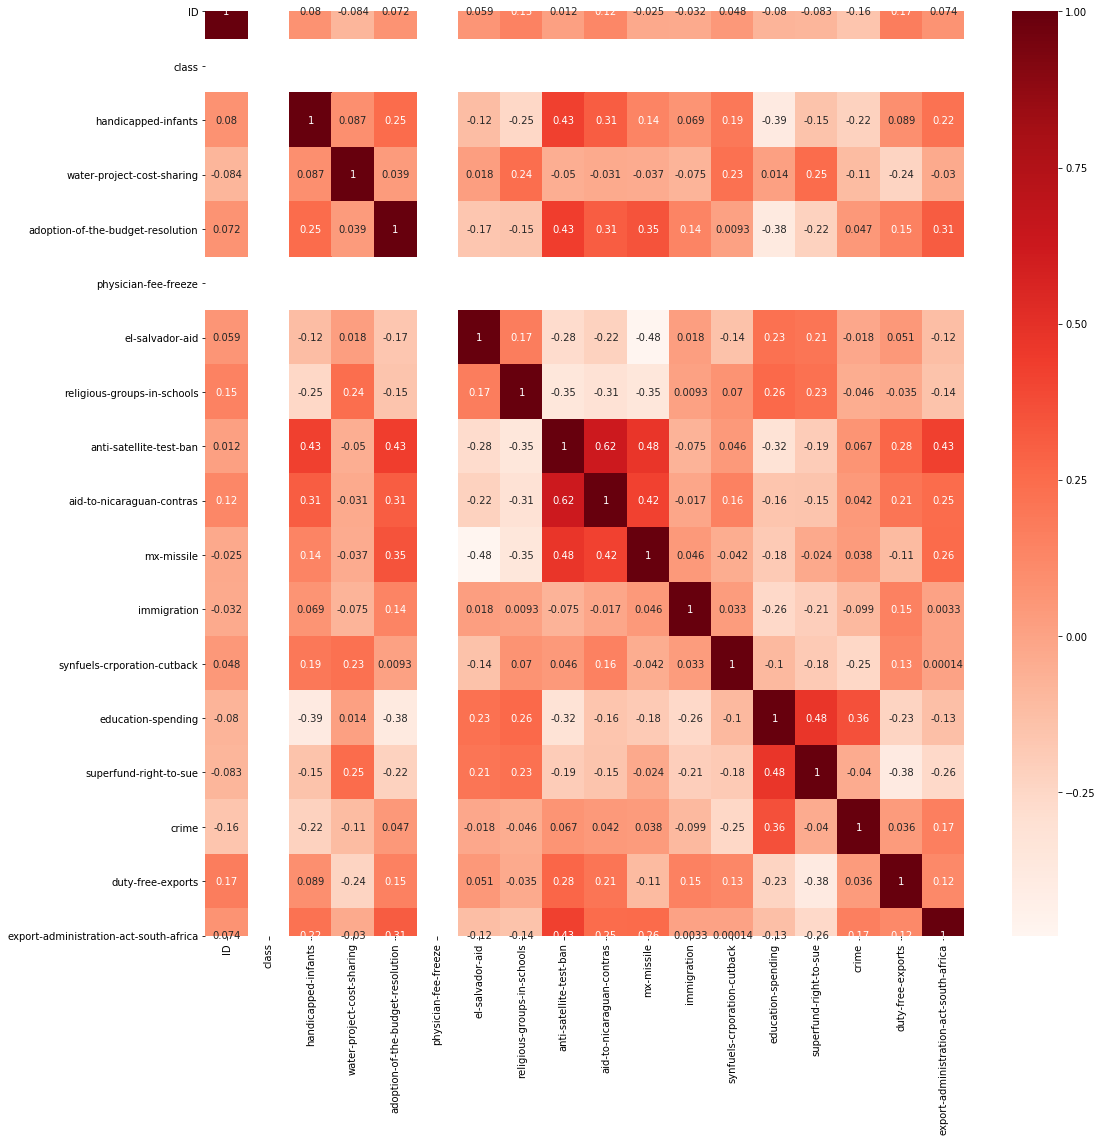

In [32]:
plt.figure(figsize=(17,17))
cor = imputed_rep.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

###### Correlations to the class with more than 50% ordered high to low

In [33]:
cor_target = abs(cor['class'])
relevant_features_50 = cor_target[cor_target>0.5] 
relevant_features_50.sort_values(ascending=False)


Series([], Name: class, dtype: float64)

###### Correlations to class with more than 45% ordered high to low

In [34]:
relevant_features_45 = cor_target[cor_target> 0.45]
relevant_features_45.sort_values(ascending=False)

Series([], Name: class, dtype: float64)

###### All correlations

In [35]:
cor_target = abs(cor['class'])
relevant_features = cor_target
relevant_features.sort_values(ascending=False)

ID                                       NaN
class                                    NaN
handicapped-infants                      NaN
water-project-cost-sharing               NaN
adoption-of-the-budget-resolution        NaN
physician-fee-freeze                     NaN
el-salvador-aid                          NaN
religious-groups-in-schools              NaN
anti-satellite-test-ban                  NaN
aid-to-nicaraguan-contras                NaN
mx-missile                               NaN
immigration                              NaN
synfuels-crporation-cutback              NaN
education-spending                       NaN
superfund-right-to-sue                   NaN
crime                                    NaN
duty-free-exports                        NaN
export-administration-act-south-africa   NaN
Name: class, dtype: float64

###### Feature importance:

C:\Users\Radi Radev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Radi Radev\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


physician-fee-freeze                      0.462674
el-salvador-aid                           0.152489
adoption-of-the-budget-resolution         0.103843
education-spending                        0.096190
mx-missile                                0.045085
anti-satellite-test-ban                   0.044240
synfuels-crporation-cutback               0.041274
export-administration-act-south-africa    0.010257
duty-free-exports                         0.008096
aid-to-nicaraguan-contras                 0.007797
dtype: float64


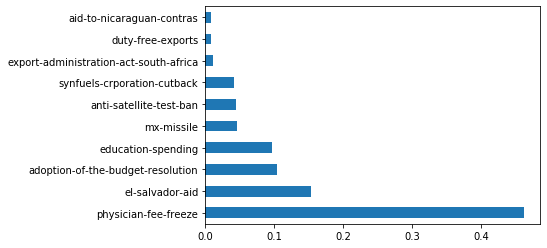

In [36]:
data = train_merged
X = data.iloc[:,0:18].drop(['ID','class'], axis=1) #independent columns without class and ID
y = data.iloc[:,1:2]    #target column class
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_ #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
print(feat_importances.nlargest(10))#print ordered high to low
plt.show()

###### Univariate feature importance:

In [37]:
data=train_merged
X = data.iloc[:,0:18].drop(['ID','class'], axis=1)  #independent columns without class and ID
y = data.iloc[:,1:2]    #target column i.e class
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                              Feature       Score
3                physician-fee-freeze  116.205488
11                 education-spending   66.738630
4                     el-salvador-aid   55.154619
2   adoption-of-the-budget-resolution   47.677226
7           aid-to-nicaraguan-contras   44.968093
8                          mx-missile   41.326935
13                              crime   36.209496
14                  duty-free-exports   33.773404
12             superfund-right-to-sue   32.680708
6             anti-satellite-test-ban   21.513997


###### Test Version with 10 Indipendant Variables

In [38]:
# Split
y = train_merged['class']
X = train_merged[['physician-fee-freeze',
'education-spending',
'el-salvador-aid',
'adoption-of-the-budget-resolution',
'aid-to-nicaraguan-contras',
'crime',
'superfund-right-to-sue',
'anti-satellite-test-ban',
'mx-missile',
'duty-free-exports']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 26)

#  Scale
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [39]:
X_train.shape


(146, 10)

In [40]:
y_test.shape

(72,)

###### Model selection:

In [41]:
models = []
models.append(('LogisticRegression', LogisticRegression(solver='lbfgs')))
models.append(('NaiveBayes', GaussianNB()))
models.append(('GradientDescent', SGDClassifier()))
models.append(('GradientBoosting', GradientBoostingClassifier(max_depth=5)))
models.append(('SupportVectorClassifier', SVC(gamma='scale')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier(n_estimators=100)))
models.append(('SVC linear kernel',SVC(kernel="linear", C=0.025)))
models.append(('GaussianProcessClassifier',GaussianProcessClassifier(1.0 * RBF(1.0))))
models.append(('MLPClassifier', MLPClassifier(alpha=1, max_iter=1000)))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))


###### K-Fold Crossvalidation Unscaled

In [42]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
7,RandomForest,0.972644
9,GaussianProcessClassifier,0.972644
3,GradientBoosting,0.972414
6,DecisionTree,0.972414
11,AdaBoostClassifier,0.972414
2,GradientDescent,0.965977
0,LogisticRegression,0.965747
4,SupportVectorClassifier,0.965747
10,MLPClassifier,0.965747
5,KNN,0.951954


###### K-Fold Crossvalidation Scaled

In [43]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
8,SVC linear kernel,0.986207
0,LogisticRegression,0.979540
7,RandomForest,0.979310
2,GradientDescent,0.972644
9,GaussianProcessClassifier,0.972644
3,GradientBoosting,0.972414
6,DecisionTree,0.972414
11,AdaBoostClassifier,0.972414
4,SupportVectorClassifier,0.965747
10,MLPClassifier,0.958851


###### RandomForest

In [44]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9722222222222222

Text(0.5, 1, 'Confusion Matrix')

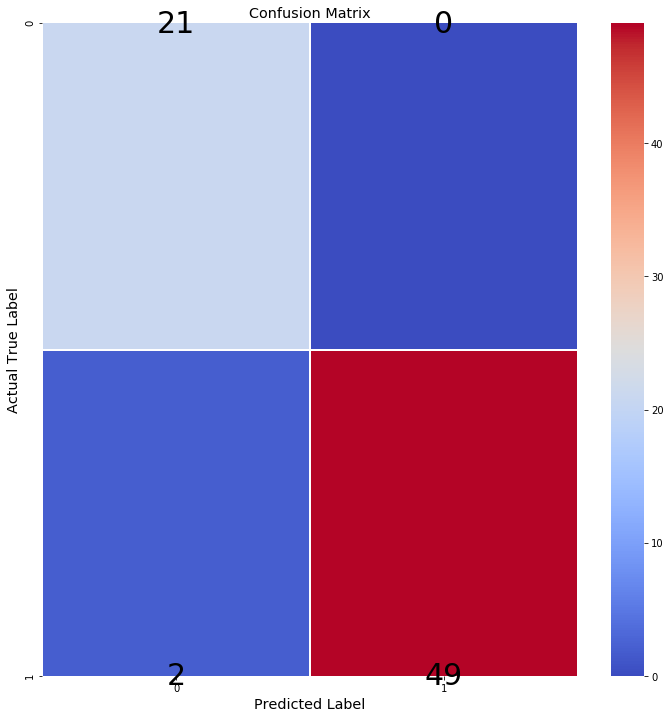

In [45]:
matrix = confusion_matrix(y_test, rf.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')





Initial run
0.9444444444444444
Best parameter according to grid search
{'criterion': 'gini', 'max_depth': 9, 'max_features': 5, 'max_leaf_nodes': 5, 'min_samples_split': 0.1, 'n_estimators': 47}
Tested the best parameters and they provide not so good results
criterion='gini', max_depth=9, max_features=5, max_leaf_nodes=5, min_samples_split=0.1, n_estimators=47
0.9444444444444444
criterion='gini', max_depth=10, max_features=5, max_leaf_nodes=5, min_samples_split=2, n_estimators=47
0.9722222222222222
Unscaled Random Forest performs better:
criterion='gini', max_depth=9, max_features=5, max_leaf_nodes=5, min_samples_split=2, n_estimators=47
0.9444444444444444
We are getting similar model performance close to the initial validation, however, the unscaled version performs slightly better


Text(0.5, 1, 'Confusion Matrix')

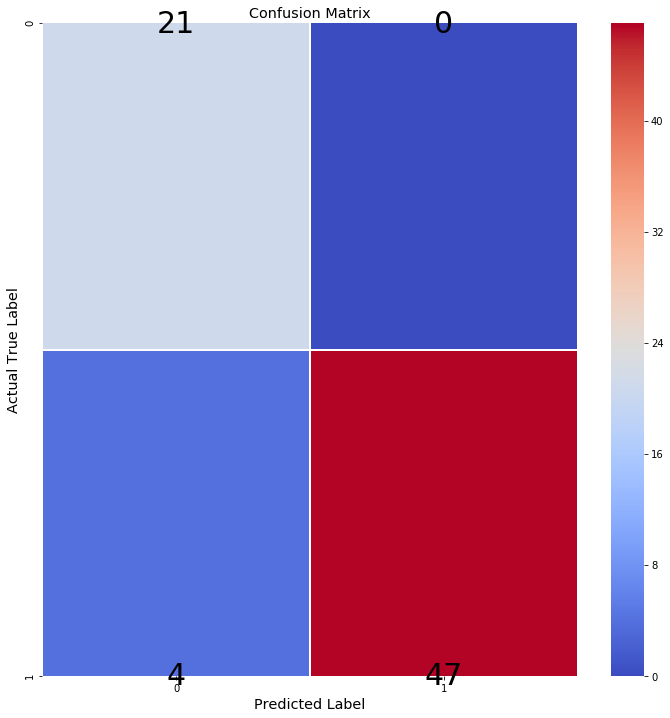

In [46]:
rf = RandomForestClassifier()

# Define grid (possible parameter space)
# Note running this takes more time
grid = {
        'criterion': ['gini'], #['gini', 'entropy'],
        'n_estimators': [47], #np.arange(1,50,1), 
        'max_depth': [9], #np.arange(1, 10,1),
        'min_samples_split': [0.1], # np.arange(0.1,1,0.1)
        'max_leaf_nodes': [5], #np.arange(2,10,1),
        'max_features': [5] #np.arange(1,6,1),
       }


rf_cv = GridSearchCV(rf, grid, cv=5)

rf_cv.fit(X_train_scaled, y_train)

print("Initial run")
print(rf_cv.score(X_test_scaled, y_test))

print("Best parameter according to grid search")
print(rf_cv.best_params_)

print("Tested the best parameters and they provide not so good results")
print("criterion='gini', max_depth=9, max_features=5, max_leaf_nodes=5, min_samples_split=0.1, n_estimators=47")
rf2 = RandomForestClassifier(criterion='gini', max_depth=9, max_features=5, max_leaf_nodes=5, min_samples_split=0.1, n_estimators=47)
rf2.fit(X_train_scaled, y_train)

print(rf2.score(X_test_scaled, y_test))

rf3 = RandomForestClassifier(criterion='gini', max_depth=10, max_features=5, max_leaf_nodes=5, min_samples_split=2, n_estimators=47)
rf3.fit(X_train_scaled, y_train)
print("criterion='gini', max_depth=10, max_features=5, max_leaf_nodes=5, min_samples_split=2, n_estimators=47")
print(rf3.score(X_test_scaled, y_test))

print("Unscaled Random Forest performs better:")

rf4 = RandomForestClassifier(criterion='gini', max_depth=9, max_features=5, max_leaf_nodes=5, min_samples_split=2, n_estimators=47)
rf4.fit(X_train, y_train)
print("criterion='gini', max_depth=9, max_features=5, max_leaf_nodes=5, min_samples_split=2, n_estimators=47")

print(rf4.score(X_test, y_test))

print("We are getting similar model performance close to the initial validation, however, the unscaled version performs slightly better")

matrix = confusion_matrix(y_test, rf4.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### SupportVectorClassifier Linear Kernel

In [47]:
SVClin= SVC(kernel="linear", C=0.025)
SVClin.fit(X_train, y_train)
SVClin.score(X_test, y_test)

0.9027777777777778

Text(0.5, 1, 'Confusion Matrix')

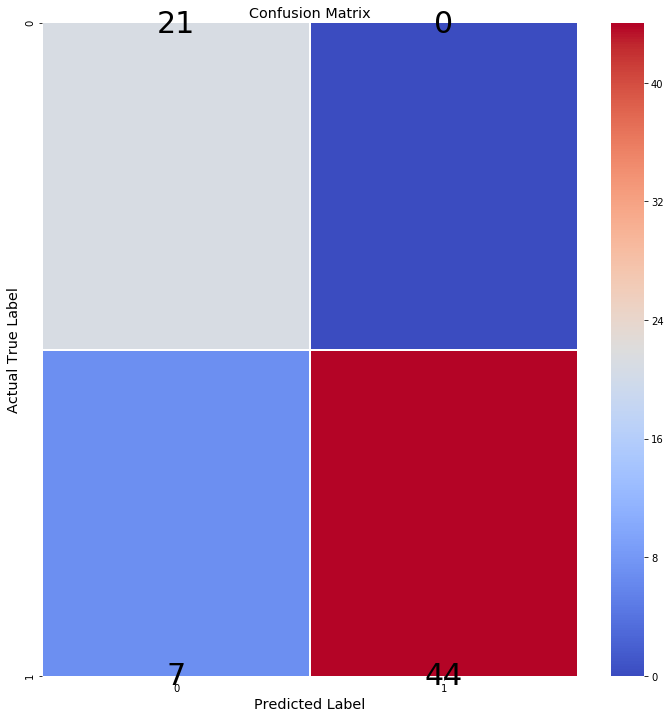

In [48]:
matrix = confusion_matrix(y_test, SVClin.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [49]:
SVClin= SVC(kernel="linear", C=0.025)
SVClin.fit(X_train_scaled, y_train)
SVClin.score(X_test_scaled, y_test)

0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

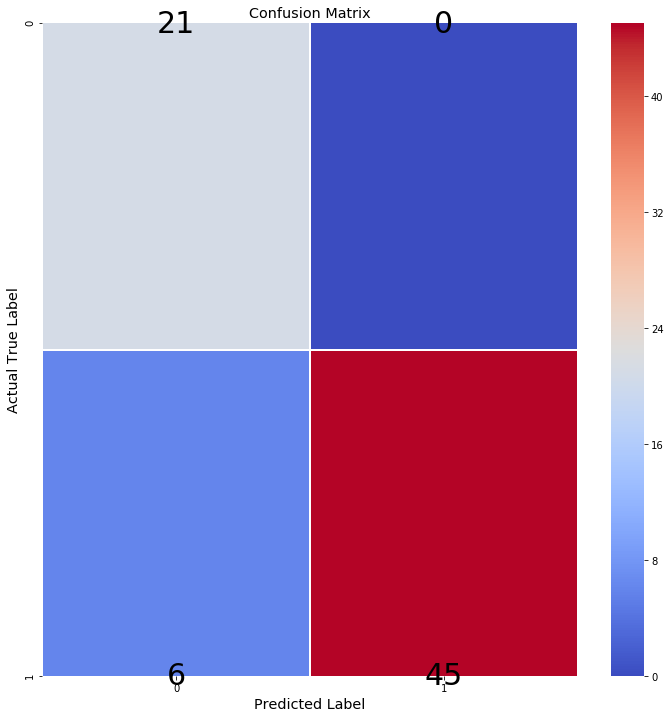

In [50]:
matrix = confusion_matrix(y_test, SVClin.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### Test version with 8 Indipendant Variables

In [51]:
# Split
y = train_merged['class']
X = train_merged[['physician-fee-freeze',
'education-spending',
'el-salvador-aid',
'adoption-of-the-budget-resolution',
'aid-to-nicaraguan-contras',
'crime',
'superfund-right-to-sue',
'anti-satellite-test-ban',
]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 26)

#  Scale
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

###### K-Fold validation Not scaled

In [52]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
7,RandomForest,0.979310
4,SupportVectorClassifier,0.972644
9,GaussianProcessClassifier,0.972644
1,NaiveBayes,0.972644
2,GradientDescent,0.972644
10,MLPClassifier,0.972644
3,GradientBoosting,0.972414
6,DecisionTree,0.972414
11,AdaBoostClassifier,0.972414
5,KNN,0.965747


###### K-Fold Validation Scaled

In [53]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
8,SVC linear kernel,0.986207
0,LogisticRegression,0.979540
2,GradientDescent,0.979540
4,SupportVectorClassifier,0.972644
7,RandomForest,0.972644
10,MLPClassifier,0.972644
1,NaiveBayes,0.972644
3,GradientBoosting,0.972414
6,DecisionTree,0.972414
11,AdaBoostClassifier,0.972414


###### GradientDescent

In [54]:
gdsc=SGDClassifier()
gdsc.fit(X_train, y_train)
gdsc.score(X_test, y_test)

0.9305555555555556

Text(0.5, 1, 'Confusion Matrix')

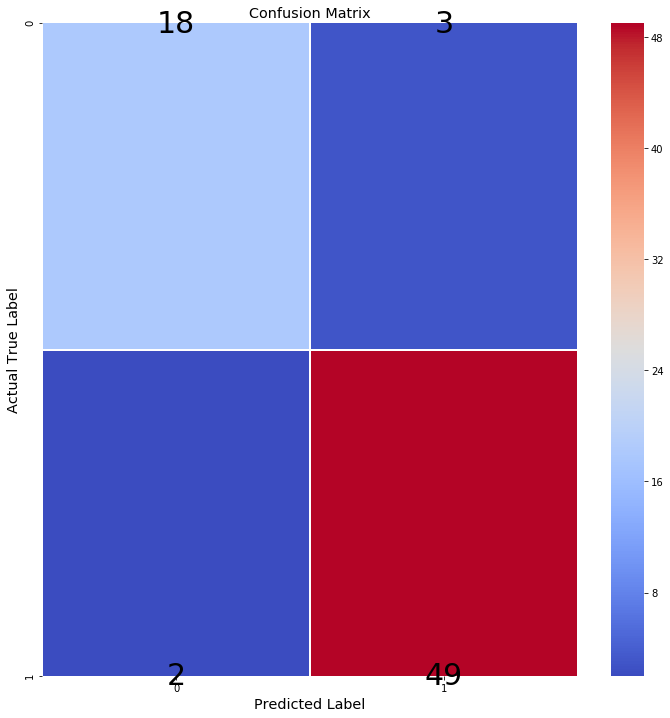

In [55]:
matrix = confusion_matrix(y_test, gdsc.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [56]:
gdsc=SGDClassifier()
gdsc.fit(X_train_scaled, y_train)
gdsc.score(X_test_scaled, y_test)

0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

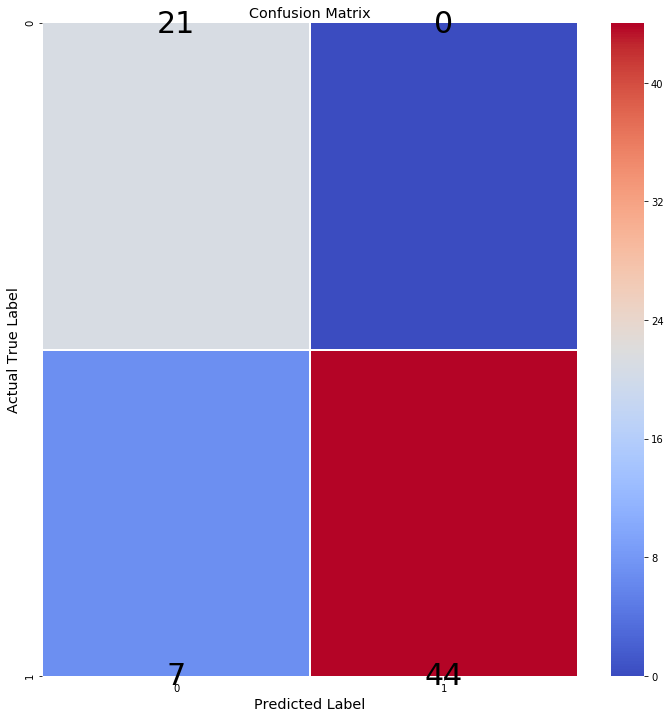

In [57]:
matrix = confusion_matrix(y_test, gdsc.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

0.9444444444444444
Best parameters according to grid search
{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l1'}
Parameter tunning - eta0=0.01, learning_rate='adaptive', loss='squared_hinge', penalty='l1'
0.9305555555555556
Parameter tunning - eta0=0.01, learning_rate='adaptive', loss='squared_hinge', penalty='l1'
0.9444444444444444


C:\Users\Radi Radev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1, 'Confusion Matrix')

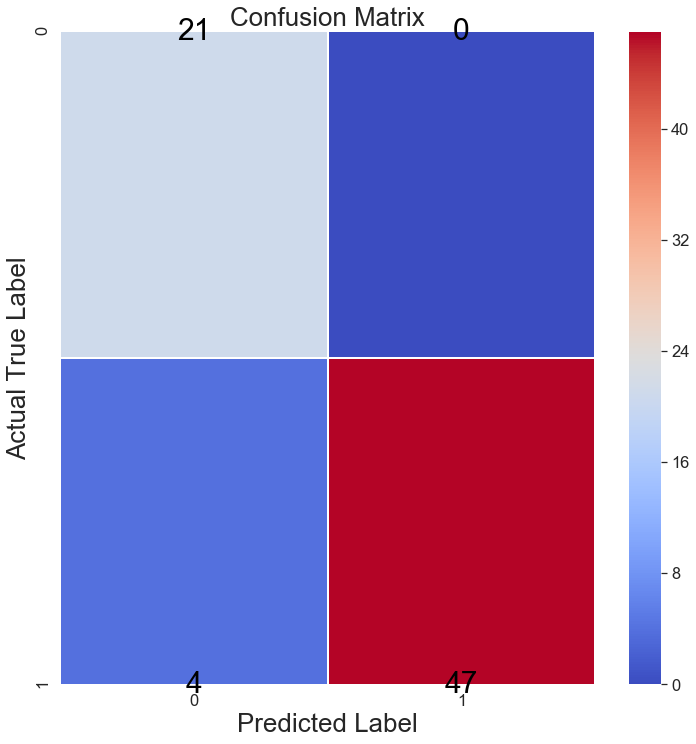

In [58]:
gd = SGDClassifier()

# Define grid (possible parameter space)
grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty': ['l1','l2','elasticnet'], 
        'eta0': [0.01],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
       }


gd_cv = GridSearchCV(gd, grid, cv=5)

gd_cv.fit(X_train_scaled, y_train)

print(gd_cv.score(X_test_scaled, y_test))
print('Best parameters according to grid search')
print(gd_cv.best_params_)

gd2 = SGDClassifier(eta0=0.01, learning_rate='adaptive', loss='squared_hinge', penalty='l1')
gd2.fit(X_train_scaled, y_train)

print("Parameter tunning - eta0=0.01, learning_rate='adaptive', loss='squared_hinge', penalty='l1'")
print(gd2.score(X_test_scaled, y_test))

gd3 = SGDClassifier(eta0=0.01, learning_rate='adaptive', loss='squared_hinge', penalty='l1')

gd3.fit(X_train, y_train)
print("Parameter tunning - eta0=0.01, learning_rate='adaptive', loss='squared_hinge', penalty='l1'")
print(gd3.score(X_test, y_test))

sns.set(font_scale=1.5)
matrix = confusion_matrix(y_test, gd3.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### SupportVectorClassifier

In [59]:
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9583333333333334

Text(0.5, 1, 'Confusion Matrix')

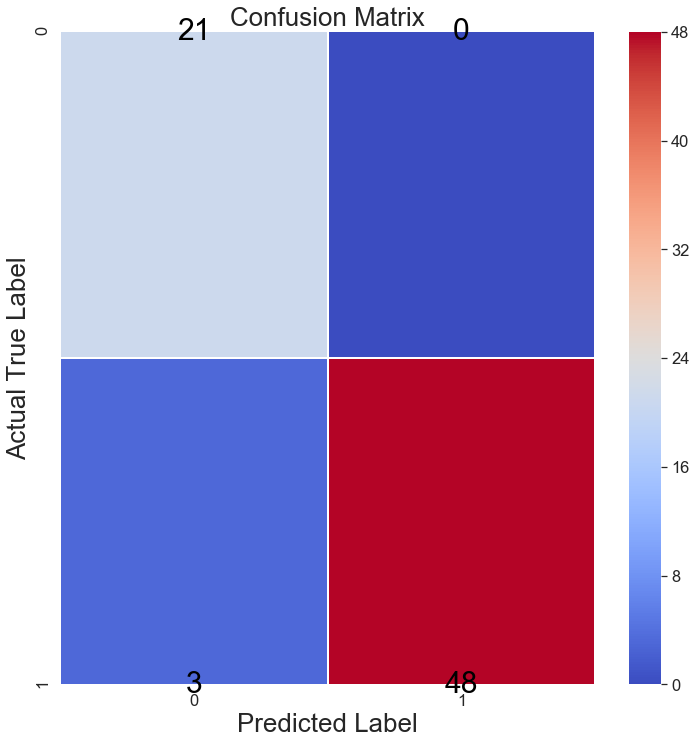

In [60]:
matrix = confusion_matrix(y_test, svc.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [61]:
svc = SVC(gamma='scale')
svc.fit(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)

0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

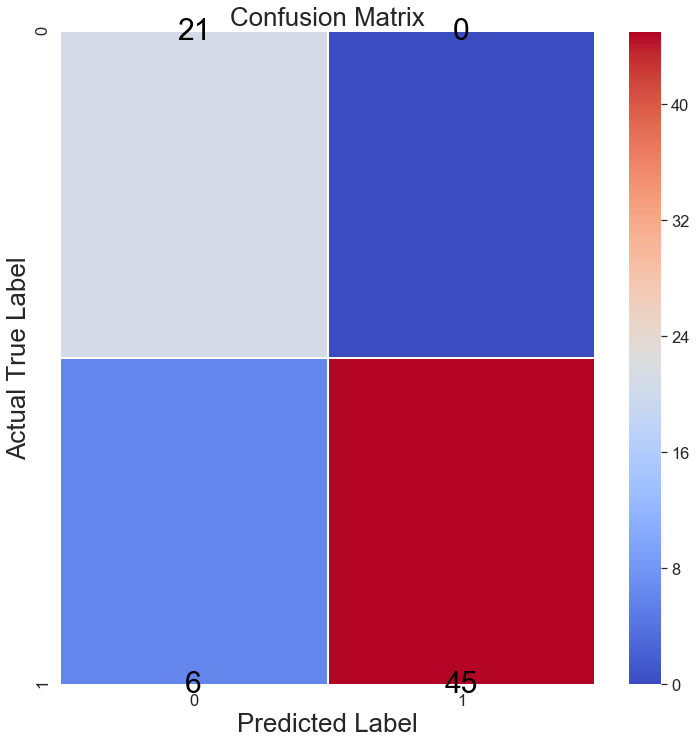

In [62]:
matrix = confusion_matrix(y_test, svc.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### Test Version with 5 Indipendant variables

Droping:
mx-missile 
crime
duty-free-exports  
superfund-right-to-sue 
anti-satellite-test-ban 

In [63]:
# Split
y = train_merged['class']
X = train_merged[['physician-fee-freeze',
'education-spending',
'el-salvador-aid',
'adoption-of-the-budget-resolution',
'aid-to-nicaraguan-contras']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 26)

#  Scale
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

###### K-Fold Validation Unscaled

In [64]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
1,NaiveBayes,0.979540
6,DecisionTree,0.979310
2,GradientDescent,0.972644
4,SupportVectorClassifier,0.972644
7,RandomForest,0.972644
9,GaussianProcessClassifier,0.972644
11,AdaBoostClassifier,0.965747
3,GradientBoosting,0.959080
0,LogisticRegression,0.958851
5,KNN,0.958851


###### K-Fold Validation Scaled

In [65]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
0,LogisticRegression,0.979540
1,NaiveBayes,0.979540
8,SVC linear kernel,0.979540
6,DecisionTree,0.979310
2,GradientDescent,0.972644
4,SupportVectorClassifier,0.972644
7,RandomForest,0.972644
9,GaussianProcessClassifier,0.972644
11,AdaBoostClassifier,0.972644
3,GradientBoosting,0.959080


###### LogisticRegression

In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\Radi Radev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9305555555555556

Text(0.5, 1, 'Confusion Matrix')

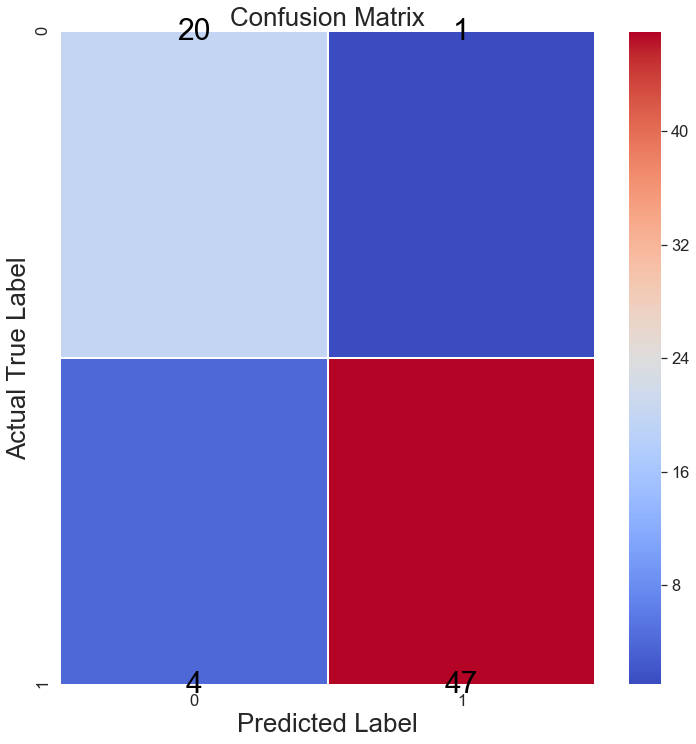

In [67]:
matrix = confusion_matrix(y_test, lr.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [68]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

C:\Users\Radi Radev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

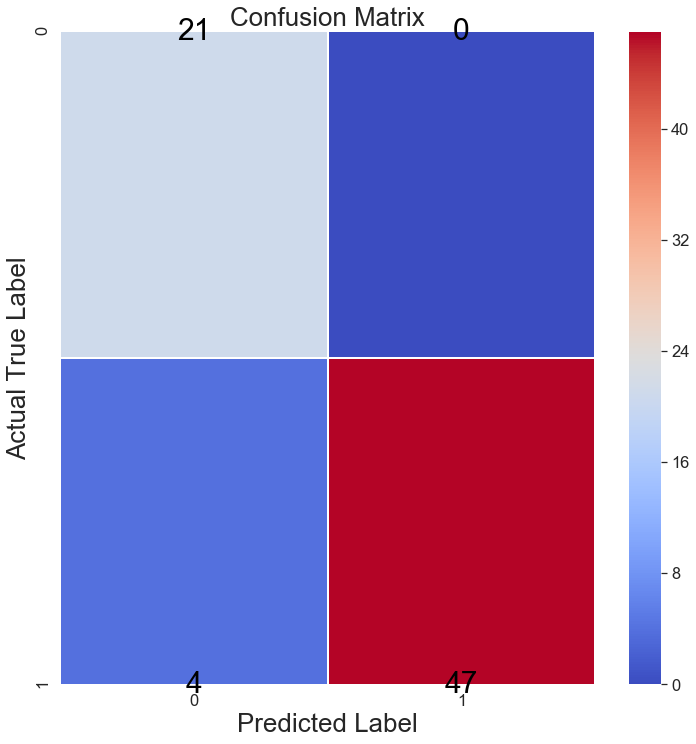

In [69]:
matrix = confusion_matrix(y_test, lr.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### NaiveBayes

In [70]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

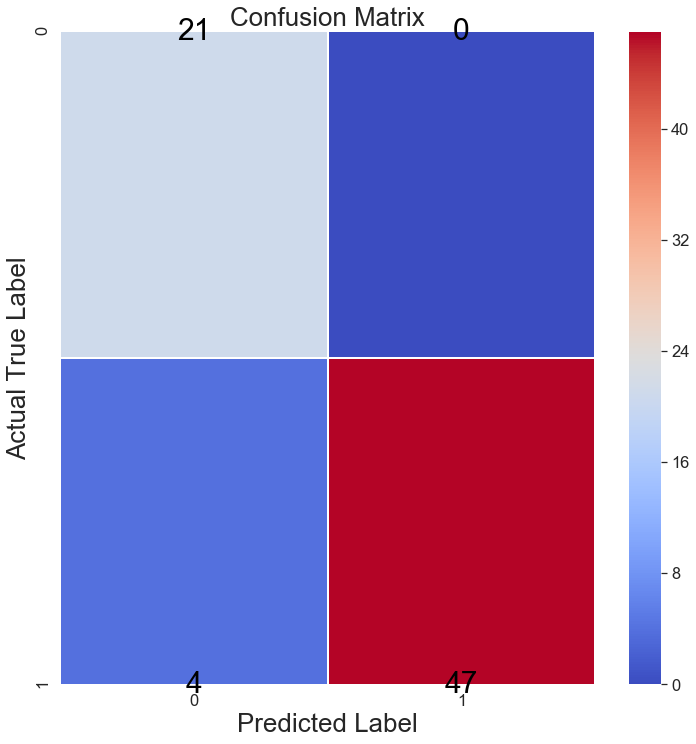

In [71]:
matrix = confusion_matrix(y_test, nb.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [72]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb.score(X_test_scaled, y_test)

0.7083333333333334

Text(0.5, 1, 'Confusion Matrix')

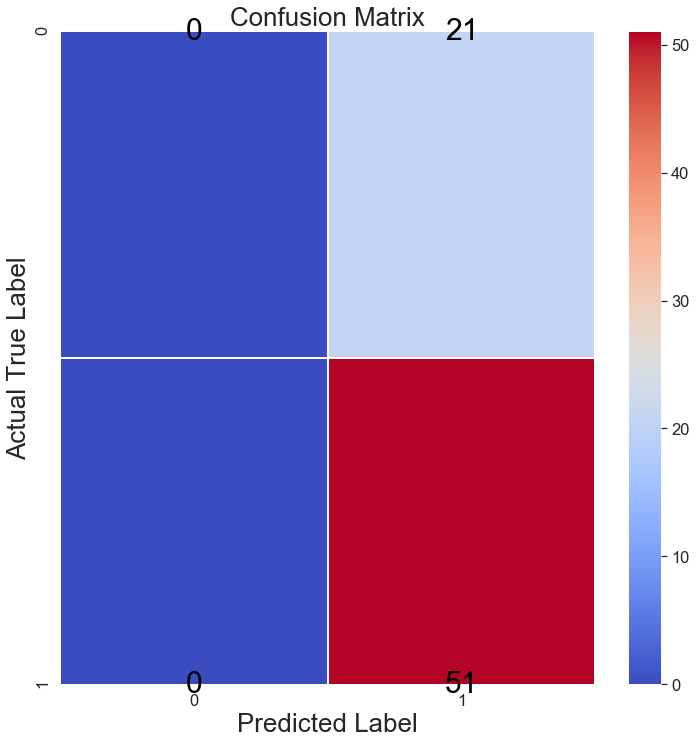

In [73]:
matrix = confusion_matrix(y_test, nb.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### Looks like scaling is causing misclassification

###### Test Version with 3 Indipendant Variables
Droping:
'aid-to-nicaraguan-contras'
'el-salvador-aid'

In [74]:
# Split
y = train_merged['class']
X = train_merged[['physician-fee-freeze',
'education-spending',
'adoption-of-the-budget-resolution',
]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 26)

#  Scale
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

###### K-Fold Validation Unscaled

In [75]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
1,NaiveBayes,0.986207
4,SupportVectorClassifier,0.986207
6,DecisionTree,0.986207
7,RandomForest,0.986207
11,AdaBoostClassifier,0.986207
0,LogisticRegression,0.979540
5,KNN,0.979540
10,MLPClassifier,0.979310
3,GradientBoosting,0.972644
2,GradientDescent,0.972644


###### K-Fold Validation Scaled

In [76]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
0,LogisticRegression,0.986207
1,NaiveBayes,0.986207
4,SupportVectorClassifier,0.986207
6,DecisionTree,0.986207
7,RandomForest,0.986207
8,SVC linear kernel,0.986207
9,GaussianProcessClassifier,0.986207
11,AdaBoostClassifier,0.979310
3,GradientBoosting,0.972644
10,MLPClassifier,0.972644


###### LogisticRegression

In [77]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\Radi Radev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

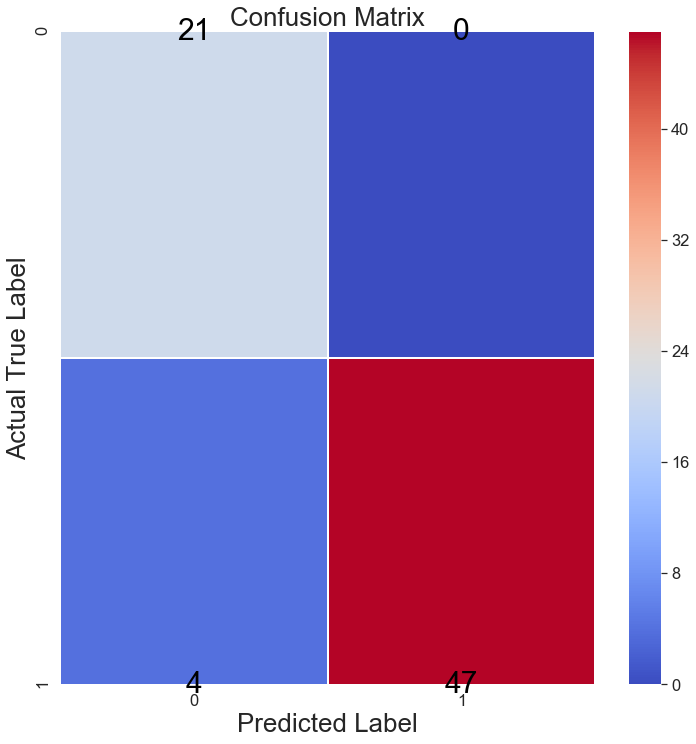

In [78]:
%matplotlib inline
sns.set(font_scale=1.5)
matrix = confusion_matrix(y_test, lr.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [79]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

C:\Users\Radi Radev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

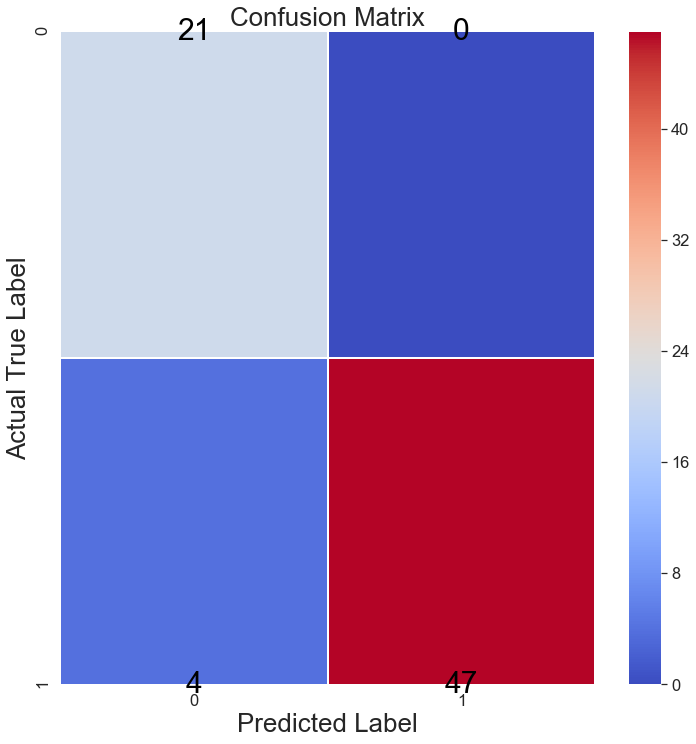

In [80]:
matrix = confusion_matrix(y_test, lr.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### NaiveBayes

In [81]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

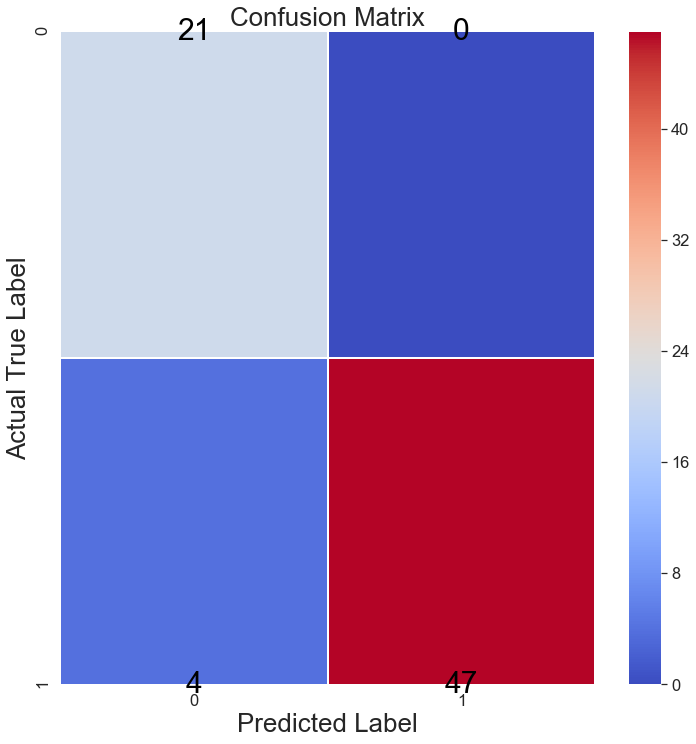

In [82]:
matrix = confusion_matrix(y_test, nb.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [83]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb.score(X_test_scaled, y_test)

0.7083333333333334

Text(0.5, 1, 'Confusion Matrix')

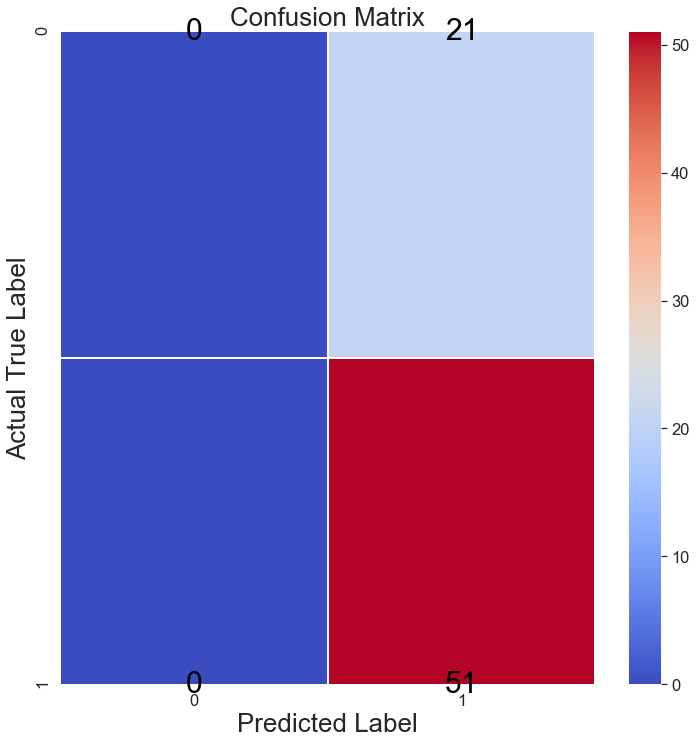

In [84]:
matrix = confusion_matrix(y_test, nb.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### SupportVectorClassifier

In [85]:
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

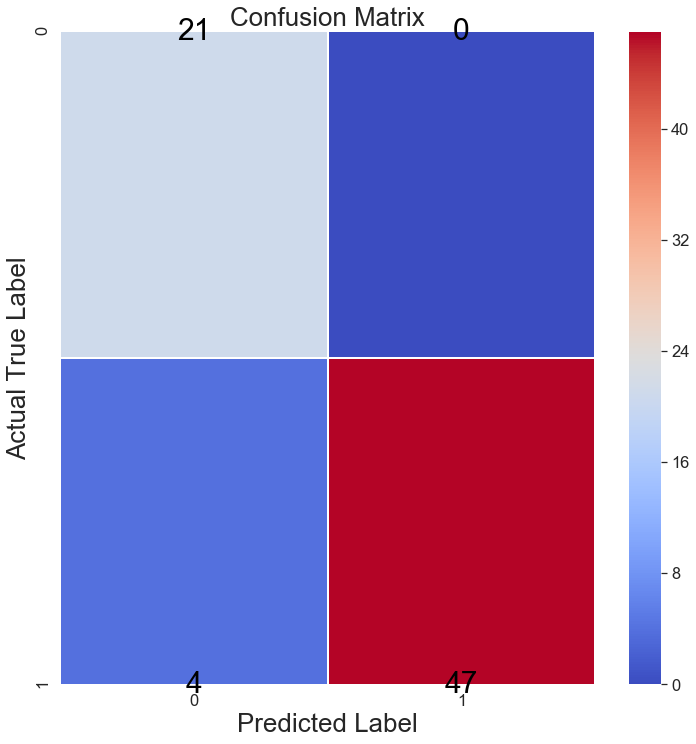

In [86]:
matrix = confusion_matrix(y_test, svc.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [87]:
svc = SVC(gamma='scale')
svc.fit(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)

0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

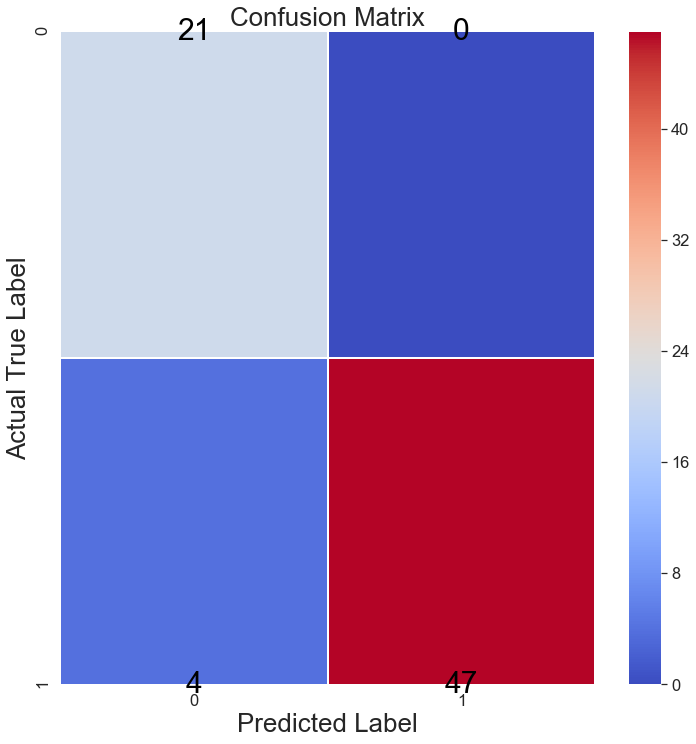

In [88]:
matrix = confusion_matrix(y_test, svc.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### GradientDescent

In [89]:
gdsc=SGDClassifier()
gdsc.fit(X_train, y_train)
gdsc.score(X_test, y_test)

0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

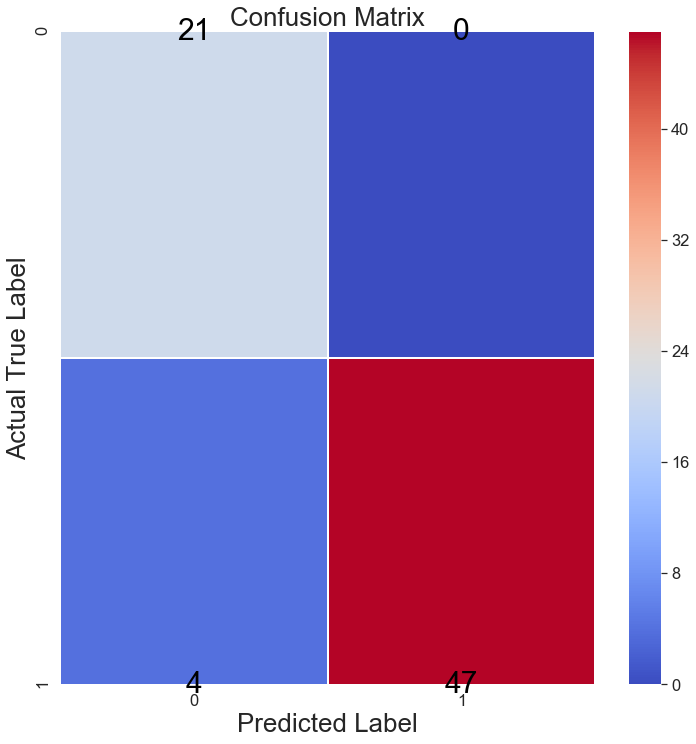

In [90]:
matrix = confusion_matrix(y_test, gdsc.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [91]:
gdsc=SGDClassifier()
gdsc.fit(X_train_scaled, y_train)
gdsc.score(X_test_scaled, y_test)

0.9305555555555556

Text(0.5, 1, 'Confusion Matrix')

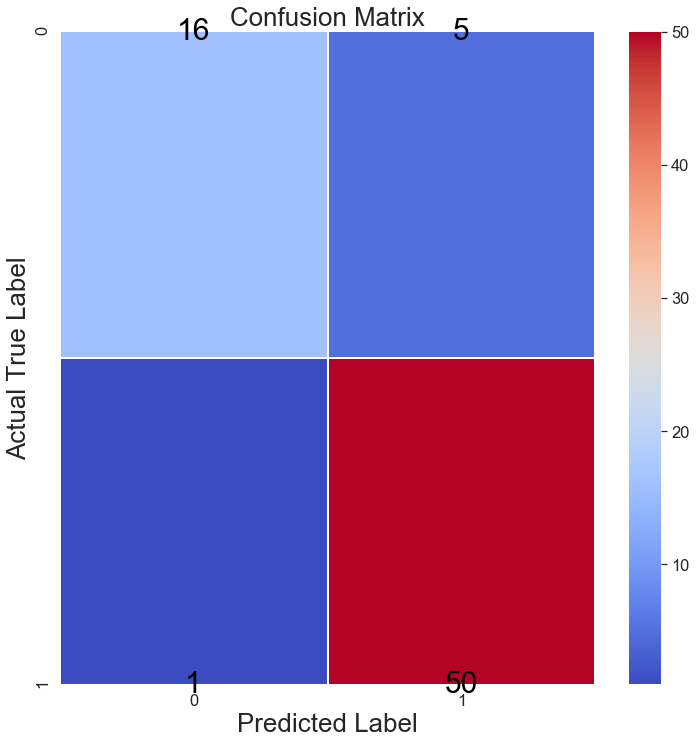

In [92]:
matrix = confusion_matrix(y_test, gdsc.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### RandomForest

In [93]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9583333333333334

Text(0.5, 1, 'Confusion Matrix')

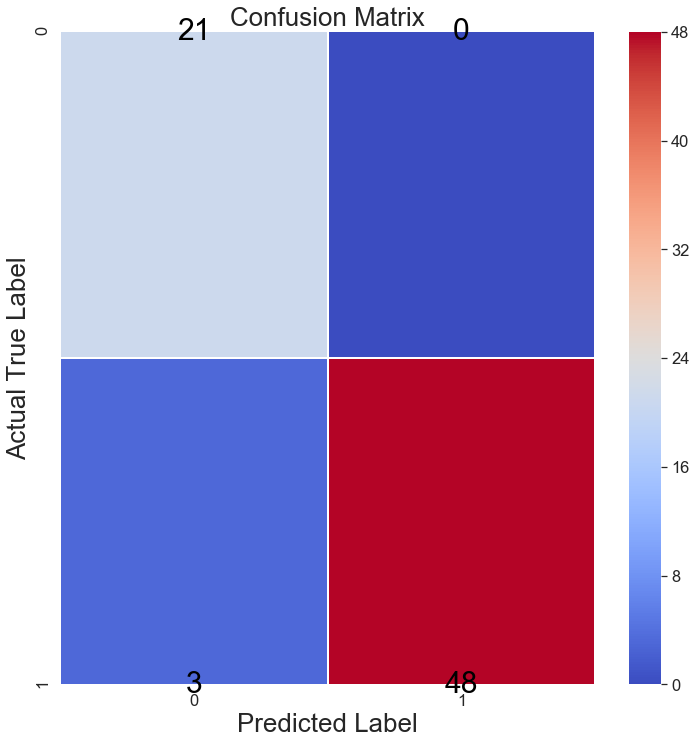

In [94]:
matrix = confusion_matrix(y_test, rf.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [95]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9444444444444444

Text(0.5, 1, 'Confusion Matrix')

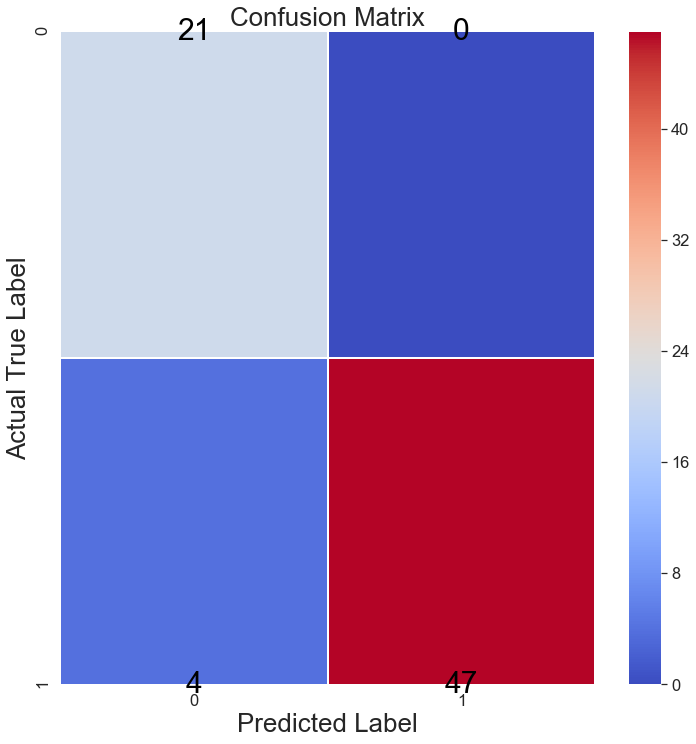

In [96]:
matrix = confusion_matrix(y_test, rf.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

###### Test Version with 2 Indipendant Variables
Droping:
education-spending

In [97]:
# Split
y = train_merged['class']
X = train_merged[['physician-fee-freeze',
'adoption-of-the-budget-resolution',
]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 26)

#  Scale
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

###### K-Fold Validation Unscaled

In [98]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
0,LogisticRegression,0.986207
1,NaiveBayes,0.986207
2,GradientDescent,0.986207
3,GradientBoosting,0.986207
4,SupportVectorClassifier,0.986207
5,KNN,0.986207
6,DecisionTree,0.986207
7,RandomForest,0.986207
8,SVC linear kernel,0.986207
10,MLPClassifier,0.986207


###### K-Fold Validation Scaled

In [99]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
0,LogisticRegression,0.986207
1,NaiveBayes,0.986207
3,GradientBoosting,0.986207
4,SupportVectorClassifier,0.986207
5,KNN,0.986207
6,DecisionTree,0.986207
7,RandomForest,0.986207
8,SVC linear kernel,0.986207
9,GaussianProcessClassifier,0.986207
10,MLPClassifier,0.986207


In [100]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

C:\Users\Radi Radev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9166666666666666

###### Test Version with 1 Indipendant Variables
Droping:
adoption-of-the-budget-resolution

In [102]:
# Split
y = train_merged['class']
X = train_merged[['physician-fee-freeze']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 26)


#  Scale
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

###### K-Fold Validation Unscaled

In [103]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
0,LogisticRegression,0.986207
1,NaiveBayes,0.986207
2,GradientDescent,0.986207
3,GradientBoosting,0.986207
4,SupportVectorClassifier,0.986207
5,KNN,0.986207
6,DecisionTree,0.986207
7,RandomForest,0.986207
8,SVC linear kernel,0.986207
9,GaussianProcessClassifier,0.986207


###### K-Fold Validation Scaled

In [104]:
lst = []
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv= kfold, scoring = 'accuracy')
    score = results.mean()
    another_list = [name,score]
    lst.append(another_list) 
best_models = pd.DataFrame(lst, columns =['Model', 'Score'])
# Sort the rows of dataframe by column 'Score'
best_models = best_models.sort_values(by ='Score',ascending=False)
best_models

,Model,Score
0,LogisticRegression,0.986207
1,NaiveBayes,0.986207
2,GradientDescent,0.986207
3,GradientBoosting,0.986207
4,SupportVectorClassifier,0.986207
5,KNN,0.986207
6,DecisionTree,0.986207
7,RandomForest,0.986207
8,SVC linear kernel,0.986207
9,GaussianProcessClassifier,0.986207


###### After testing multiple models and different number of indipendant variables, a trivial predictor immerged in the train set - one can simply predict if a certain congressman is democrat or republican based on their vote for the 'physician-fee-freeze': 93% prediction if a congressmen has voted yes to be a republican.

In [105]:
train_merged[train_merged['physician-fee-freeze']==1.0]

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
20,383.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.927835
34,385.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000
39,78.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.000000
79,76.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000
107,169.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.927835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,147.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000
77,118.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000
78,57.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.000000
79,135.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.657143


###### Best possible Optimized LogisticRegression Classifier 

Scaled

In [106]:
lr = LogisticRegression(C = 100, penalty = 'l2', solver = 'newton-cg')
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
results = model_selection.cross_val_score(lr, X_train, y_train, cv= kfold, scoring = 'accuracy')

results.mean()

0.9862068965517242

Text(0.5, 1, 'Confusion Matrix')

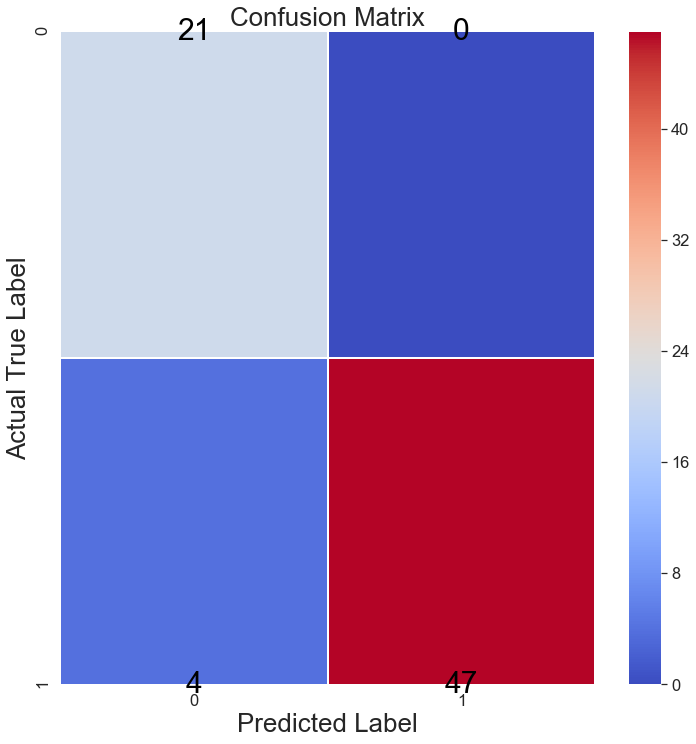

In [107]:
matrix = confusion_matrix(y_test, lr.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

Unscaled

In [108]:
lr = LogisticRegression(C = 100, penalty = 'l2', solver = 'newton-cg')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
results = model_selection.cross_val_score(lr, X_train, y_train, cv= kfold, scoring = 'accuracy')
results.mean()

0.9862068965517242

Text(0.5, 1, 'Confusion Matrix')

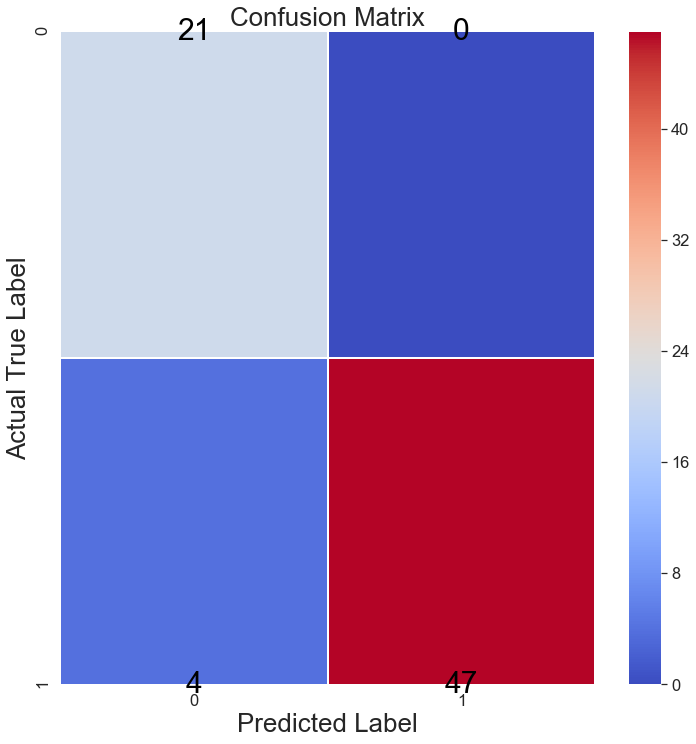

In [109]:
matrix = confusion_matrix(y_test, lr.predict(X_test))
f, ax = plt.subplots(figsize=(12, 12))
akws = {"ha": 'center',"va": 'center', "color":'black',"size": 30}
sns.heatmap(matrix, cmap=plt.cm.coolwarm, annot=True, fmt="d",annot_kws= akws, linewidths=1, ax=ax)
plt.ylabel('Actual True Label',fontsize='x-large')
plt.xlabel('Predicted Label',fontsize='x-large')
plt.title('Confusion Matrix',fontsize='x-large')

In [110]:
class_predict = imputed_test['physician-fee-freeze']
use= class_predict.values.reshape(-1,1)
use

array([[0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.   

In [111]:
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred_lr = lr.predict(use)
y_pred_lr

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.])

In [114]:
output = pd.DataFrame([imputed_test.ID, y_pred_lr], ['ID', 'Class']).transpose()
export_csv = output.to_csv ('Congressional_Voting_results_lr.csv', index = None, header=True)

###### Label Recoding done in Notepad++ 1.0 = democrat and 0.0 = republican!